# Data Science Approach to Understand Food Processing

In [1]:
#Loading Libraries
from PyPDF2 import PdfFileReader
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nltk 
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
#Reading Data and fetching length of pages
def readFoodData():
    pdfFileObj = open('D:/Campus Job/RA/NLP Task for Code of Federal Regulations.pdf', 'rb')
    
    #Creating a pdf reader object
    pdfReader = PdfFileReader(pdfFileObj)
    
    #Number of pages in pdf file 
    pageCount = pdfReader.numPages
    
    #Creating each page as an object and extracting text from page
    textList = []
    for i in range(pageCount):
        pageObj = pdfReader.getPage(i)
        textList.append(pageObj.extractText())

    return textList,pageCount

In [3]:
def lookProcess(obj1,obj2):
    
    #Tokenizing 
    tokenized = nltk.word_tokenize(obj2) 
    
    #POS Tagging
    tagged = nltk.pos_tag(tokenized)
    
    #Fetching VBG tags
    taggedVerb = set()
    for i in range(len(tagged)):
        log = (tagged[i][1] == 'VBG')
        if log == True:
            taggedVerb.add(tagged[i][0])
    return obj1,taggedVerb

In [4]:
#Fetching nodes for Network
def nodesProcess():
    graph = dict()
    for i in range(0,pages,2):
        node,process = lookProcess(raw[i],raw[i+1])
        graph[node.rstrip('\n')] = process
    return graph

In [5]:
raw,pages = readFoodData()

In [6]:
#Checking our Bipartite Network
bipartiteGraph = nodesProcess()
bipartiteGraph

{'Bread': {'baking'},
 'Cheddar cheese': {'clotting',
  'having',
  'pouring',
  'producing',
  'sprinkling',
  'stirring'},
 'Milk Chocolate': {'grinding', 'mixing'},
 'Coffee': {'commingling', 'grinding'},
 'Milk': {'adding', 'separating'},
 'Ice Cream': {'consisting', 'excluding', 'flavoring', 'freezing', 'stirring'}}

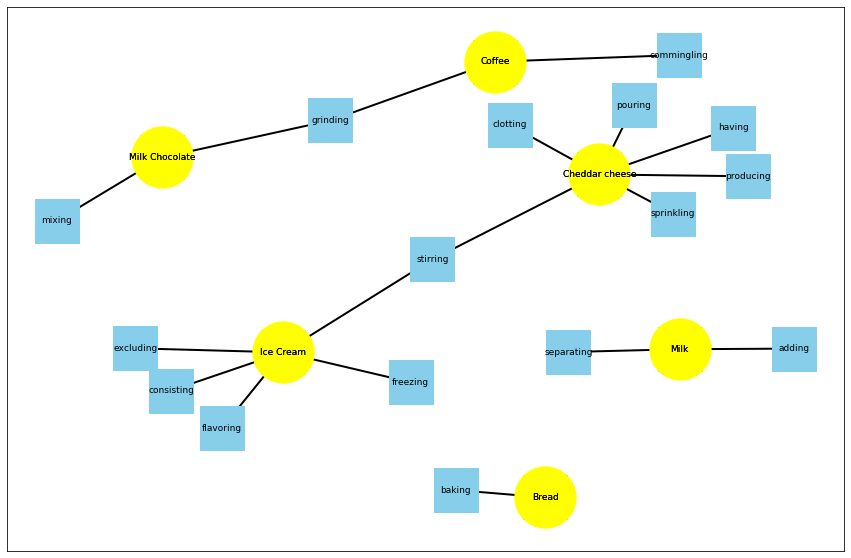

In [7]:
# Making Bipartite Network
fig = plt.figure(figsize=(15,10))
G=nx.Graph() # Create a graph

for target in bipartiteGraph.keys():
    for edge in bipartiteGraph[target]:
        G.add_edge(target, edge)

pos = nx.spring_layout(G,k=1/np.sqrt(len(G.nodes())), iterations=20)
nx.draw_networkx(G, with_labels = True, pos=pos, node_color='skyblue', edge_color = 'black', width = 2, node_size = 2000, font_size = 9, node_shape='s') # Draw the graph
for i in bipartiteGraph.keys():
    nx.draw_networkx(G.subgraph(i), pos=pos, font_size=9, node_color='yellow', font_color='Black', node_size = 3750, node_shape='o')

plt.savefig("graph.png")